In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sn

from sklearn.model_selection import train_test_split
from sklearn import metrics

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRFRegressor

In [4]:
insurance_dataset = pd.read_csv(r'medical insurance.csv')

In [5]:
insurance_dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
insurance_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
insurance_dataset.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [11]:
#statistical measures of the dataset
insurance_dataset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [12]:
# Select only the numeric columns
insurance_dataset_numeric = insurance_dataset.select_dtypes(include=[float, int])

# Compute correlation on the numeric columns
correlation_matrix = insurance_dataset_numeric.corr()

# Print the correlation matrix
print(correlation_matrix)


               age       bmi  children   charges
age       1.000000  0.109272  0.042469  0.299008
bmi       0.109272  1.000000  0.012759  0.198341
children  0.042469  0.012759  1.000000  0.067998
charges   0.299008  0.198341  0.067998  1.000000


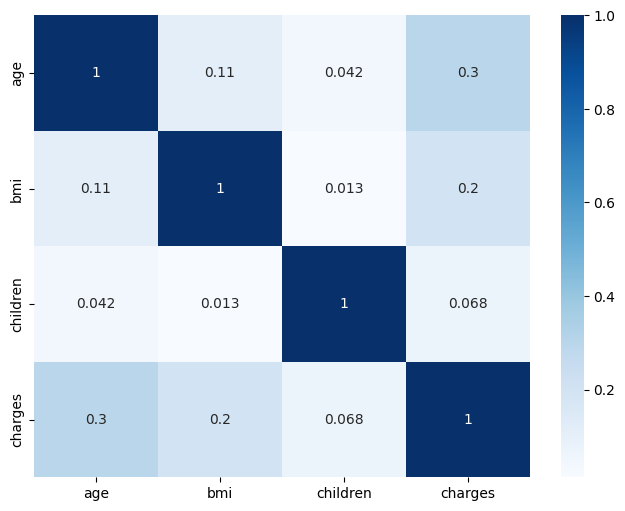

In [16]:
# Select only numeric columns for the correlation
insurance_dataset_numeric = insurance_dataset.select_dtypes(include=['float', 'int'])

# Compute correlation matrix
correlation_matrix = insurance_dataset_numeric.corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sn.heatmap(correlation_matrix, annot=True, cmap='Blues')

# Show the plot
plt.show()

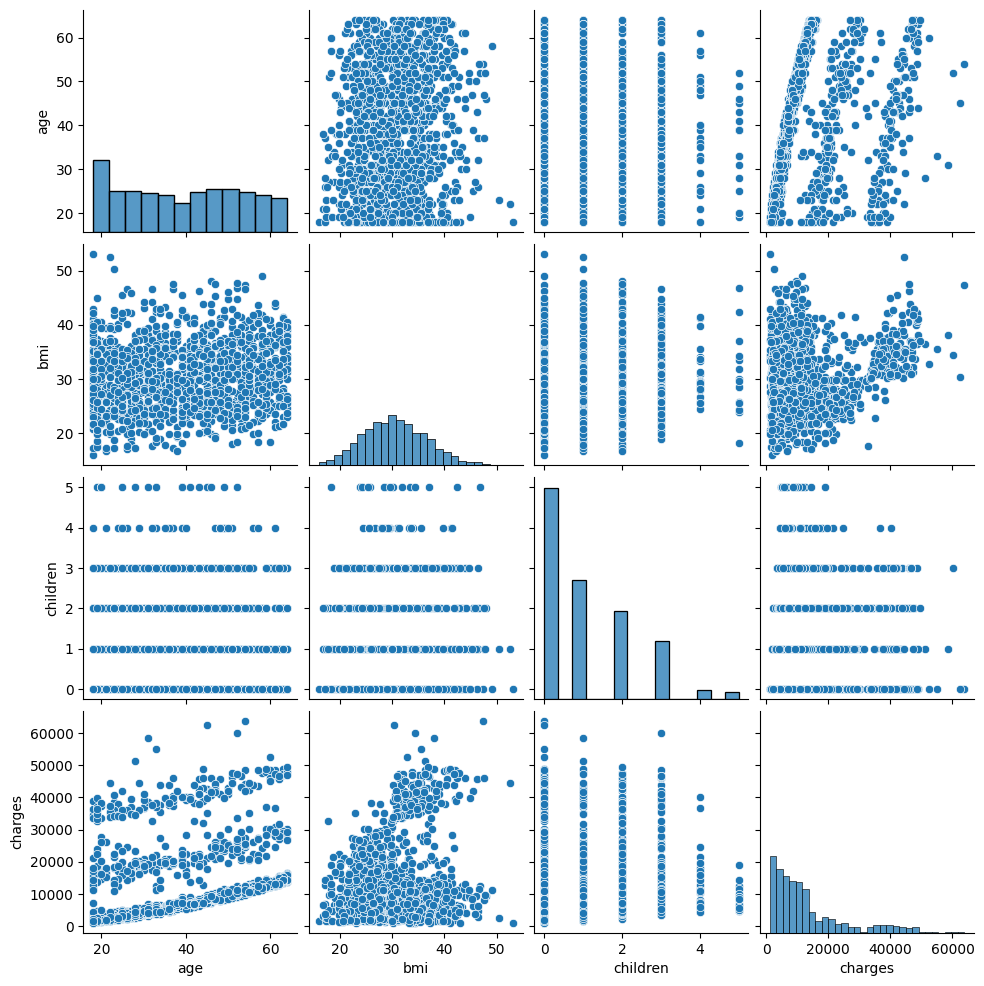

In [17]:
sn.pairplot(insurance_dataset)

C:\Users\91981\AppData\Local\Temp\ipykernel_23916\2020281944.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn.distplot(insurance_dataset['age'])


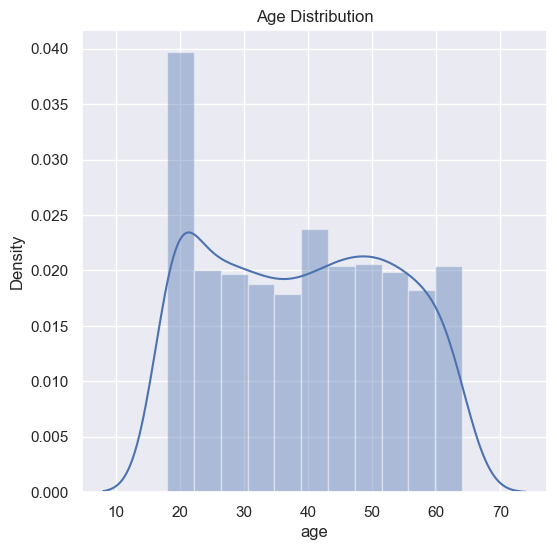

In [18]:
# distribution of age value
sn.set()
plt.figure(figsize=(6,6))
sn.distplot(insurance_dataset['age'])
plt.title('Age Distribution')
plt.show()

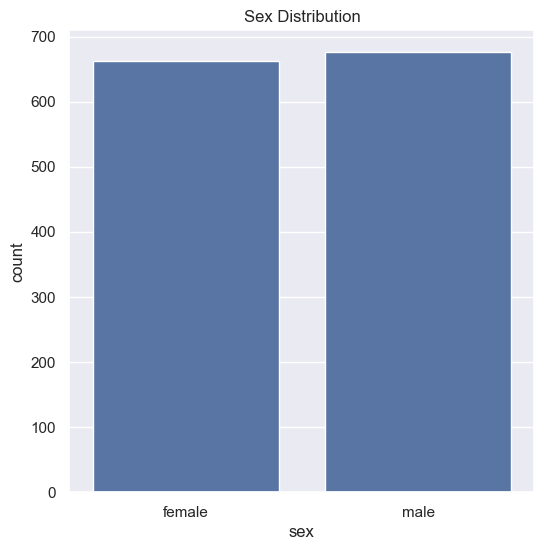

In [19]:
# Gender column
plt.figure(figsize=(6,6))
sn.countplot(x='sex', data=insurance_dataset)
plt.title('Sex Distribution')
plt.show()

C:\Users\91981\AppData\Local\Temp\ipykernel_23916\3096492476.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn.distplot(insurance_dataset['bmi'])


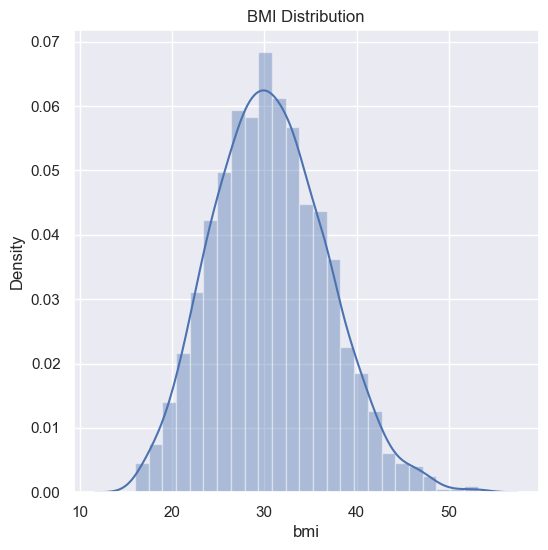

In [20]:
# bmi distribution
plt.figure(figsize=(6,6))
sn.distplot(insurance_dataset['bmi'])
plt.title('BMI Distribution')
plt.show()

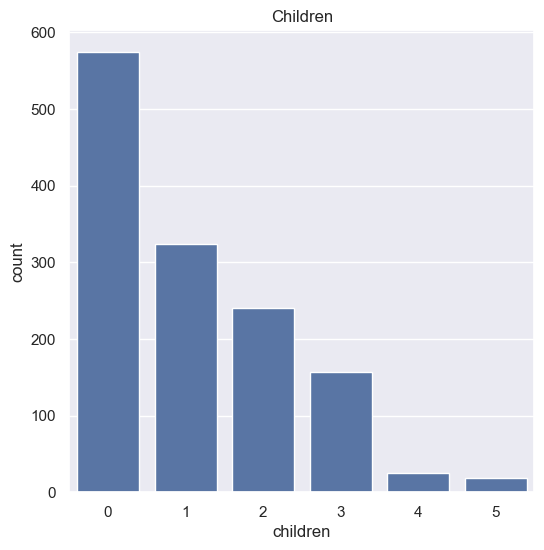

In [22]:
# children column
plt.figure(figsize=(6,6))
sn.countplot(x='children', data=insurance_dataset)
plt.title('Children')
plt.show()

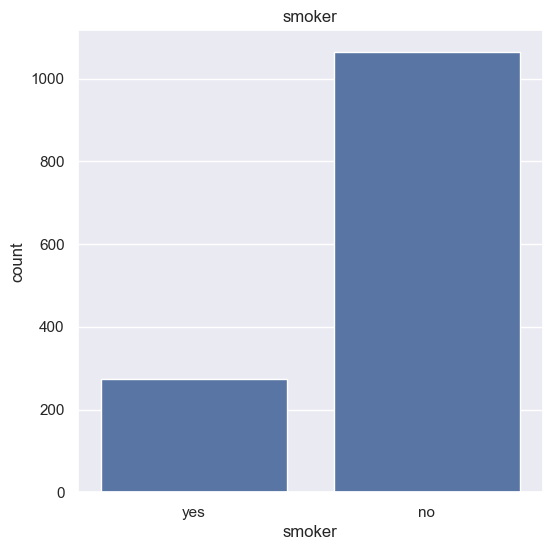

In [23]:
# smoker column
plt.figure(figsize=(6,6))
sn.countplot(x='smoker', data=insurance_dataset)
plt.title('smoker')
plt.show()

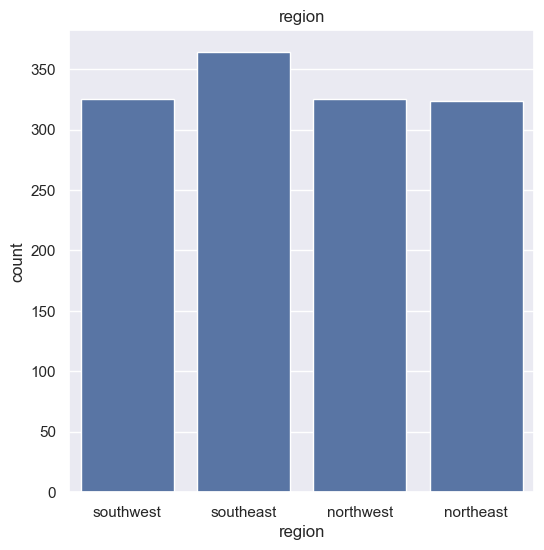

In [24]:
# region column
plt.figure(figsize=(6,6))
sn.countplot(x='region', data=insurance_dataset)
plt.title('region')
plt.show()

C:\Users\91981\AppData\Local\Temp\ipykernel_23916\2806613346.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn.distplot(insurance_dataset['charges'])


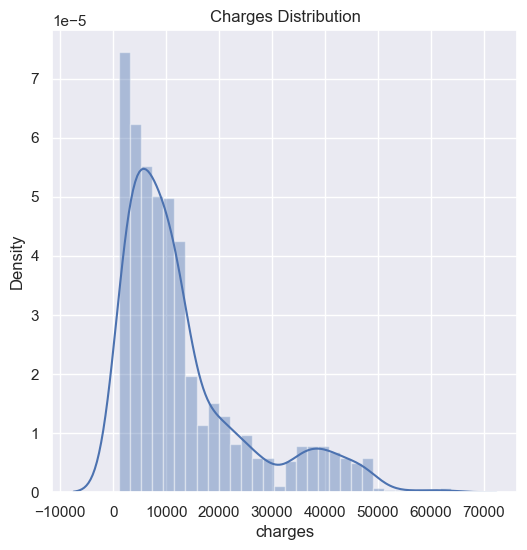

In [25]:
# distribution of charges value
plt.figure(figsize=(6,6))
sn.distplot(insurance_dataset['charges'])
plt.title('Charges Distribution')
plt.show()

In [ ]:
"""DATA PREPROCESSING
encoding the categorical features"""

In [26]:
# encoding sex column
insurance_dataset.replace({'sex':{'male':0,'female':1}}, inplace=True)

3 # encoding 'smoker' column
insurance_dataset.replace({'smoker':{'yes':0,'no':1}}, inplace=True)

# encoding 'region' column
insurance_dataset.replace({'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}}, inplace=True)

C:\Users\91981\AppData\Local\Temp\ipykernel_23916\2871422651.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  insurance_dataset.replace({'sex':{'male':0,'female':1}}, inplace=True)
C:\Users\91981\AppData\Local\Temp\ipykernel_23916\2871422651.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  insurance_dataset.replace({'smoker':{'yes':0,'no':1}}, inplace=True)
C:\Users\91981\AppData\Local\Temp\ipykernel_23916\2871422651.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version.

In [27]:
X = insurance_dataset.drop(columns='charges', axis=1)
Y = insurance_dataset['charges']
print(X)

      age  sex     bmi  children  smoker  region
0      19    1  27.900         0       0       1
1      18    0  33.770         1       1       0
2      28    0  33.000         3       1       0
3      33    0  22.705         0       1       3
4      32    0  28.880         0       1       3
...   ...  ...     ...       ...     ...     ...
1333   50    0  30.970         3       1       3
1334   18    1  31.920         0       1       2
1335   18    1  36.850         0       1       0
1336   21    1  25.800         0       1       1
1337   61    1  29.070         0       0       3

[1338 rows x 6 columns]


In [28]:
print(Y)

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


In [29]:
"""Splitting the data into Training data & Testing Data"""

'Splitting the data into Training data & Testing Data'

In [30]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)
print(X.shape, X_train.shape, X_test.shape)

(1338, 6) (1070, 6) (268, 6)


In [31]:
"""LINEAR REGRESSION"""

'LINEAR REGRESSION'

In [36]:
# loading the Linear Regression model
regressor = LinearRegression()
regressor.fit(X_train, Y_train)

LinearRegression()

In [33]:
# prediction on training data
training_data_prediction =regressor.predict(X_train)

In [34]:
# R squared value
r2_train = metrics.r2_score(Y_train, training_data_prediction)
print('R squared vale : ', r2_train)

R squared vale :  0.751505643411174


In [35]:
# prediction on test data
test_data_prediction =regressor.predict(X_test)

In [37]:
# R squared value
r2_test = metrics.r2_score(Y_test, test_data_prediction)
print('R squared vale : ', r2_test)

R squared vale :  0.7447273869684077


In [38]:
"""Random Forest"""

'Random Forest'

In [39]:
dt=RandomForestRegressor(n_estimators=10)
dt.fit(X_train,Y_train)

RandomForestRegressor(n_estimators=10)

In [40]:
y_pred=dt.predict(X_train)
train_acc=metrics.r2_score(Y_train,y_pred)

train_acc

0.9706626380755055

In [41]:
y1_pred=dt.predict(X_test)
test_acc=metrics.r2_score(Y_test,y1_pred)

test_acc

0.8309401089993464

In [42]:
"""XGBoost"""

'XGBoost'

In [43]:
xb=XGBRFRegressor()
xb.fit(X_train,Y_train)

XGBRFRegressor(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bytree=None, device=None,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, feature_types=None, gamma=None,
               grow_policy=None, importance_type=None,
               interaction_constraints=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=None, n_jobs=None,
               num_parallel_tree=None, objective='reg:squarederror',
               random_state=None, reg_alpha=None, ...)

In [44]:
z_pred=xb.predict(X_train)
trainn_acc=metrics.r2_score(Y_train,z_pred)

trainn_acc

0.9061540391692158

In [45]:
z1_pred=xb.predict(X_test)
testt_acc=metrics.r2_score(Y_test,z1_pred)

testt_acc

0.8684672708336666

In [46]:
"""Decision Tree"""

'Decision Tree'

In [47]:
mt=DecisionTreeRegressor()
mt.fit(X_train,Y_train)

DecisionTreeRegressor()

In [48]:
x_pred=mt.predict(X_train)
trainnn_acc=metrics.r2_score(Y_train,x_pred)

trainnn_acc

1.0

In [49]:
x1_pred=mt.predict(X_test)
testtt_acc=metrics.r2_score(Y_test,x1_pred)

testtt_acc

0.7185460290880871

In [52]:
"""Building a Predictive System"""

input_data = (31,1,25.74,0,1,0)

# changing input_data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = regressor.predict(input_data_reshaped)
print(prediction)

print('The insurance cost is USD ', prediction[0])

[3760.0805765]
The insurance cost is USD  3760.0805764960496


c:\Users\91981\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
